# Missing value imputation: imputers

Examples on how to use the missing values imputers available in Feature-engine.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import feature_engine.missing_data_imputers as mdi

In [2]:
import feature_engine 
feature_engine.__version__

'0.4.0'

In [3]:
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [5]:
X_train[['LotFrontage', 'MasVnrArea']].isnull().mean()

LotFrontage    0.184932
MasVnrArea     0.004892
dtype: float64

### MeanMedianImputer

The MeanMedianImputer replaces NA in numerical variables by either the mean or the median value of the variable.

#### Median

In [6]:
median_imputer = mdi.MeanMedianImputer(imputation_method='median',
                                       variables=['LotFrontage', 'MasVnrArea'])
median_imputer.fit(X_train)

MeanMedianImputer(imputation_method='median',
                  variables=['LotFrontage', 'MasVnrArea'])

In [7]:
# dictionary with the mappings for each variable

median_imputer.imputer_dict_

{'LotFrontage': 69.0, 'MasVnrArea': 0.0}

In [8]:
# let's corroborate that the dictionary above contains the mean values of the variables

X_train[['LotFrontage', 'MasVnrArea']].median()

LotFrontage    69.0
MasVnrArea      0.0
dtype: float64

In [9]:
# transform the data
train_t= median_imputer.transform(X_train)
test_t= median_imputer.transform(X_test)

# and check we no longer have NA
train_t[['LotFrontage', 'MasVnrArea']].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

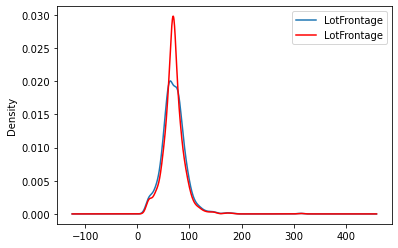

In [10]:
# we can see that the distribution has changed slightly with
# more values accumulating towards the median after the imputation

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Automatically select all numerical variables

If no variable list is indicated, the imputer will select all numerical variables in the dataset

In [11]:
mean_imputer = mdi.MeanMedianImputer(imputation_method='mean')

mean_imputer.fit(X_train)

MeanMedianImputer(imputation_method='mean',
                  variables=['MSSubClass', 'LotFrontage', 'LotArea',
                             'OverallQual', 'OverallCond', 'YearBuilt',
                             'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                             'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                             '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                             'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                             'FullBath', 'HalfBath', 'BedroomAbvGr',
                             'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                             'GarageYrBlt', 'GarageCars', 'GarageArea',
                             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', ...])

In [12]:
mean_imputer.variables

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

It doesn't matter whether the variables show NA or not. A dictionary will be created for each variable. Only variables with NA will be filled during the transform.

## EndTailImputer

The EndTailImputer replaces the NA by a value located at the tails of the variable distribution. We can select if we want to find the number using the Gaussian approximation (mean plus or minus 3* std), the interquantile range proximity rule or the maximum value.

We can also select whether we would like to replace NA by a number from the  left or right  tail.

### Gaussian distribution and right tail

In [13]:
tail_imputer = mdi.EndTailImputer(distribution='gaussian',
                                  tail='right',
                                  fold=3,
                                  variables=['LotFrontage', 'MasVnrArea'])

tail_imputer.fit(X_train)

EndTailImputer(distribution='gaussian', fold=3, tail='right',
               variables=['LotFrontage', 'MasVnrArea'])

In [14]:
tail_imputer.imputer_dict_

{'LotFrontage': 138.9022201686726, 'MasVnrArea': 648.3947111415157}

In [15]:
# transform the data
train_t = tail_imputer.transform(X_train)
test_t = tail_imputer.transform(X_test)

# and check we no longer have NA
train_t['LotFrontage'].isnull().sum()

0

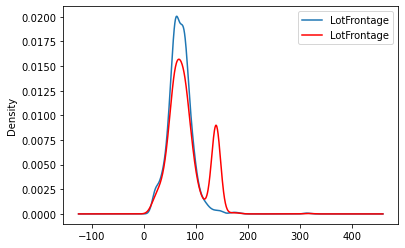

In [16]:
# we can see that the distribution has changed slightly with
# more values accumulating towards the right tail

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Skewed distribution, left tail

In [17]:
tail_imputer = mdi.EndTailImputer(distribution='skewed',
                                  tail='left',
                                  fold=3,
                                  variables=['LotFrontage', 'MasVnrArea'])

tail_imputer.fit(X_train)

EndTailImputer(distribution='skewed', fold=3, tail='left',
               variables=['LotFrontage', 'MasVnrArea'])

In [18]:
tail_imputer.imputer_dict_

{'LotFrontage': -8.0, 'MasVnrArea': -510.0}

In [19]:
# transform the data
train_t = tail_imputer.transform(X_train)
test_t = tail_imputer.transform(X_test)

train_t[['LotFrontage', 'MasVnrArea']].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

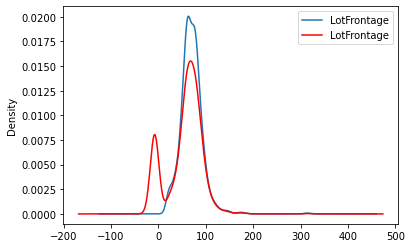

In [20]:
# we can see that the distribution has changed slightly with now more values
#  accumulating towards the  left tail

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## CategoricalVariableImputer

This imputer works only for categorical variables. It replaces the NA by the arbitrary label "Missing" or a by the most frequent category.

In [21]:
X_train[['Alley', 'MasVnrType']].isnull().mean()

Alley         0.939335
MasVnrType    0.004892
dtype: float64

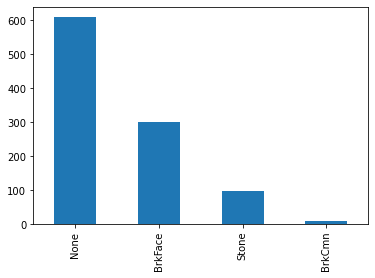

In [22]:
X_train['MasVnrType'].value_counts().plot.bar()

In [23]:
addLabel_imputer = mdi.CategoricalVariableImputer(variables=['Alley', 'MasVnrType'])

addLabel_imputer.fit(X_train)

CategoricalVariableImputer(imputation_method='missing', return_object=False,
                           variables=['Alley', 'MasVnrType'])

In [24]:
train_t = addLabel_imputer.transform(X_train)
test_t = addLabel_imputer.transform(X_test)

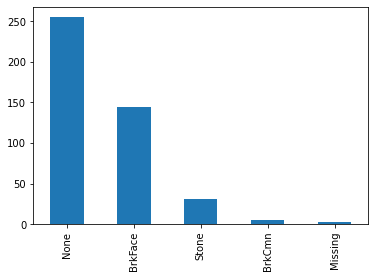

In [25]:
# we can observe in the below plot, the presence of a new category, where before there were NA
test_t['MasVnrType'].value_counts().plot.bar()

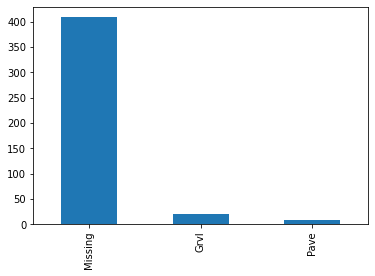

In [26]:
test_t['Alley'].value_counts().plot.bar()

## FrequentCategoryImputer

The FrequentCategoryImputer works only with categorical variables. It replaces the NA by the most frequent label, this is by the most popular label in the dataset, for a specific variable.

In [27]:
frequentLabel_imputer = mdi.CategoricalVariableImputer(imputation_method='frequent', variables='MasVnrType')

frequentLabel_imputer.fit(X_train)

CategoricalVariableImputer(imputation_method='frequent', return_object=False,
                           variables=['MasVnrType'])

In [28]:
frequentLabel_imputer.imputer_dict_

{'MasVnrType': 'None'}

In [29]:
train_t = frequentLabel_imputer.transform(X_train)
test_t = frequentLabel_imputer.transform(X_test)

train_t['MasVnrType'].value_counts()

None       614
BrkFace    301
Stone       97
BrkCmn      10
Name: MasVnrType, dtype: int64

See how the number of observations for None in MasVnrType has increased from 864 to 872, thanks to replacing the NA with this label in the dataset.

### Automatically select categorical variables

When no variable list is passed when calling the imputer, all categorical variables will be selected by the imputer

In [30]:
frequentLabel_imputer = mdi.CategoricalVariableImputer()
frequentLabel_imputer.fit(X_train)
frequentLabel_imputer.imputer_dict_

{'MSZoning': 'Missing',
 'Street': 'Missing',
 'Alley': 'Missing',
 'LotShape': 'Missing',
 'LandContour': 'Missing',
 'Utilities': 'Missing',
 'LotConfig': 'Missing',
 'LandSlope': 'Missing',
 'Neighborhood': 'Missing',
 'Condition1': 'Missing',
 'Condition2': 'Missing',
 'BldgType': 'Missing',
 'HouseStyle': 'Missing',
 'RoofStyle': 'Missing',
 'RoofMatl': 'Missing',
 'Exterior1st': 'Missing',
 'Exterior2nd': 'Missing',
 'MasVnrType': 'Missing',
 'ExterQual': 'Missing',
 'ExterCond': 'Missing',
 'Foundation': 'Missing',
 'BsmtQual': 'Missing',
 'BsmtCond': 'Missing',
 'BsmtExposure': 'Missing',
 'BsmtFinType1': 'Missing',
 'BsmtFinType2': 'Missing',
 'Heating': 'Missing',
 'HeatingQC': 'Missing',
 'CentralAir': 'Missing',
 'Electrical': 'Missing',
 'KitchenQual': 'Missing',
 'Functional': 'Missing',
 'FireplaceQu': 'Missing',
 'GarageType': 'Missing',
 'GarageFinish': 'Missing',
 'GarageQual': 'Missing',
 'GarageCond': 'Missing',
 'PavedDrive': 'Missing',
 'PoolQC': 'Missing',
 'Fenc

## RandomSampleImputer

The RandomSampleImputer works for both categorical and numerical variables. It will extract a random sample from the observations where data is available, and use it to replace the NA.

When no variable list is passed, it will default to all variables in the dataset.

### Setting a single seed for batch request

In [31]:
# note that the imputer has a random_state option for reproducibility
# more on the seed for the imputer in the documentation

random_imputer = mdi.RandomSampleImputer(
    variables=['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea'],
    random_state=10)

random_imputer.fit(X_train)

RandomSampleImputer(random_state=10, seed='general', seeding_method='add',
                    variables=['Alley', 'MasVnrType', 'LotFrontage',
                               'MasVnrArea'])

In [32]:
# the imputer saves a copy of the variables from the training set to impute new data

random_imputer.X_.head()

,Alley,MasVnrType,LotFrontage,MasVnrArea
64,NaN,BrkFace,NaN,573.0
682,NaN,None,NaN,0.0
960,NaN,None,50.0,0.0
1384,NaN,None,60.0,0.0
1100,NaN,None,60.0,0.0


In [33]:
train_t = random_imputer.transform(X_train)
test_t = random_imputer.transform(X_test)

In [34]:
train_t[['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea']].isnull().mean()

Alley          0.0
MasVnrType     0.0
LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

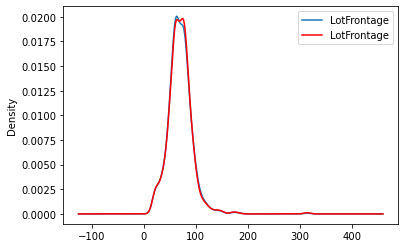

In [35]:
# when using the random sample imputer, the distribution of the variable does not change

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Setting a seed on variables, at observation level

In [36]:
imputer_obs = mdi.RandomSampleImputer(random_state=['MSSubClass', 'YrSold'],
                                  seed='observation',
                                  seeding_method='add')

imputer_obs.fit(X_train)

RandomSampleImputer(random_state=['MSSubClass', 'YrSold'], seed='observation',
                    seeding_method='add',
                    variables=['MSSubClass', 'MSZoning', 'LotFrontage',
                               'LotArea', 'Street', 'Alley', 'LotShape',
                               'LandContour', 'Utilities', 'LotConfig',
                               'LandSlope', 'Neighborhood', 'Condition1',
                               'Condition2', 'BldgType', 'HouseStyle',
                               'OverallQual', 'OverallCond', 'YearBuilt',
                               'YearRemodAdd', 'RoofStyle', 'RoofMatl',
                               'Exterior1st', 'Exterior2nd', 'MasVnrType',
                               'MasVnrArea', 'ExterQual', 'ExterCond',
                               'Foundation', 'BsmtQual', ...])

In [37]:
train_t = random_imputer.transform(X_train)
test_t = random_imputer.transform(X_test)

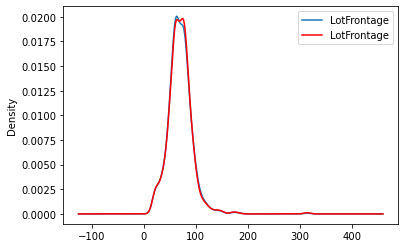

In [38]:
# when using the random sample imputer, the distribution of the variable does not change

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## AddNaNBinaryImputer

AddNaNBinaryImputer adds an additional column per indicated variable, indicating if the observation is missing (missing indicator). It adds an additional binary variable that indicates 1 if the observation contains a NaN or 0 otherwise.

Imputer works for both numerical and categorical variables.

In [39]:
addBinary_imputer = mdi.AddMissingIndicator(
    variables=['Alley', 'MasVnrType', 'LotFrontage', 'MasVnrArea'])

addBinary_imputer.fit(X_train)

AddMissingIndicator(how='missing_only',
                    variables=['Alley', 'MasVnrType', 'LotFrontage',
                               'MasVnrArea'])

In [40]:
# After transformation we see the binary _na variable for each of the indicated variables

train_t = addBinary_imputer.transform(X_train)
test_t = addBinary_imputer.transform(X_test)

train_t[['Alley_na', 'MasVnrType_na', 'LotFrontage_na', 'MasVnrArea_na']].head()

,Alley_na,MasVnrType_na,LotFrontage_na,MasVnrArea_na
64,1,0,1,0
682,1,0,1,0
960,1,0,0,0
1384,1,0,0,0
1100,1,0,0,0


In [41]:
train_t[['Alley_na', 'MasVnrType_na', 'LotFrontage_na', 'MasVnrArea_na']].mean()

Alley_na          0.939335
MasVnrType_na     0.004892
LotFrontage_na    0.184932
MasVnrArea_na     0.004892
dtype: float64

### Automatically select the variables

When no variable list is indicated, the imputer selects all variables.

In [42]:
addBinary_imputer = mdi.AddMissingIndicator()
addBinary_imputer.fit(X_train)

AddMissingIndicator(how='missing_only', variables=None)

In [43]:
data.shape

(1460, 81)

In [44]:
# we can see that after transforming the dataset, we obtain double number of columns
train_t = addBinary_imputer.transform(X_train)
test_t = addBinary_imputer.transform(X_test)

train_t.shape

(1022, 98)

## ArbitraryNumberImputer

ArbitraryNumberImputer replaces NA by an arbitrary value. It works for numerical variables. The arbitrary value needs to be defined by the user.

In [45]:
arbitrary_imputer = mdi.ArbitraryNumberImputer(
    arbitrary_number=-999, variables=['LotFrontage', 'MasVnrArea'])

arbitrary_imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999,
                       variables=['LotFrontage', 'MasVnrArea'])

In [46]:
train_t = arbitrary_imputer.transform(X_train)
test_t = arbitrary_imputer.transform(X_test)

train_t[['LotFrontage', 'MasVnrArea']].min()

LotFrontage   -999.0
MasVnrArea    -999.0
dtype: float64

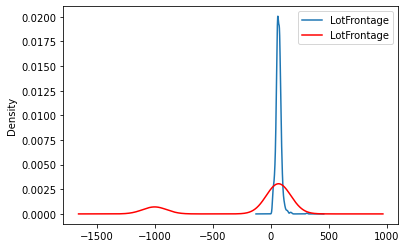

In [47]:
# we can see that the distribution has changed slightly with now more values accumulating towards the median
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')